In [143]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



In [144]:
img = cv2.imread('MarteC.jpeg', 0)
#img = np.ones((256, 256), np.uint8)

In [145]:
f = np.fft.fft2(img)
f = np.fft.fftshift(f)

f2 = np.fft.ifftshift(f)
f2 = np.fft.ifft2(f2)

magnitud = np.log(1 + np.abs(f))

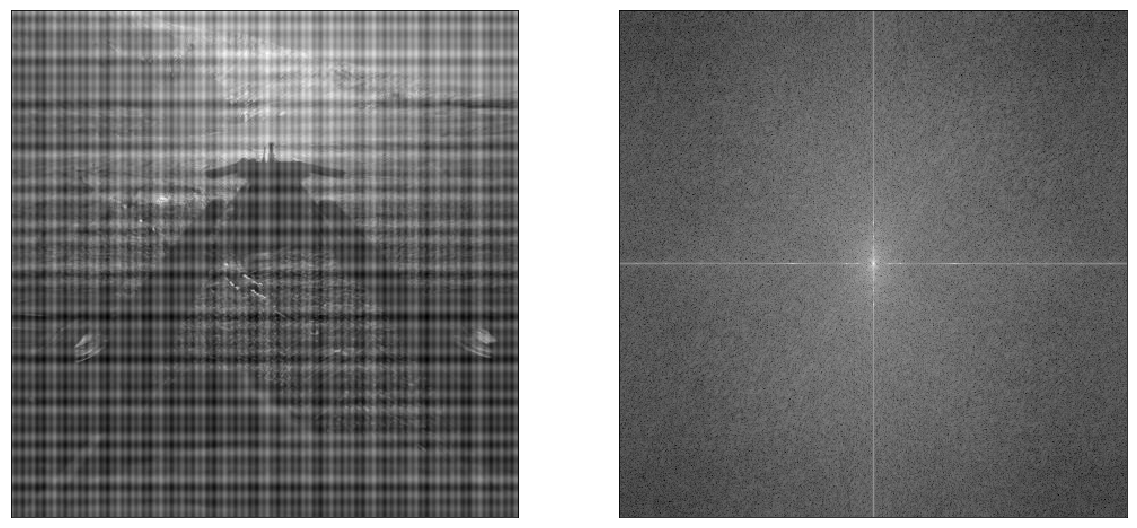

In [146]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2), plt.imshow(magnitud, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

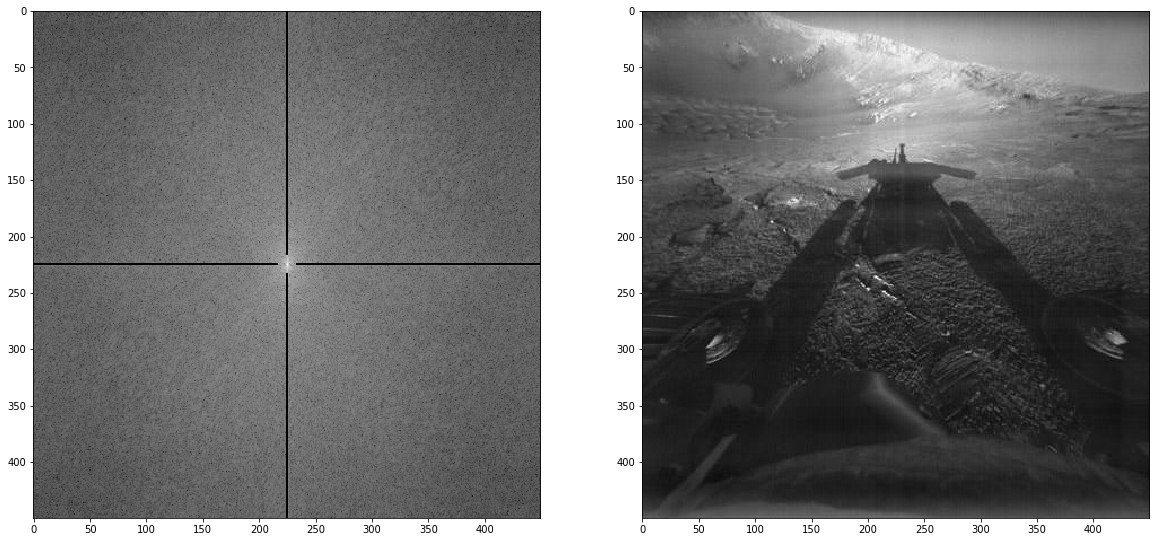

In [164]:
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2

mask = np.ones((rows, cols), np.uint8)
n = 1
n2 = 8
mask[0:rows, ccol-n:ccol+n] = 0
mask[crow - n2:crow + n2, ccol-n:ccol+n] = 1
mask[crow-n:crow+n, 0:cols] = 0
mask[crow-n:crow+n, ccol-n2:ccol+n2] = 1


f_filter = f * mask

img_back = np.fft.ifftshift(f_filter)
img_back = np.fft.ifft2(img_back)
img_back = np.abs(img_back)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1), plt.imshow(np.log(1 + np.abs(f_filter)), cmap='gray')
plt.subplot(1, 2, 2), plt.imshow(img_back, cmap='gray')
plt.show()

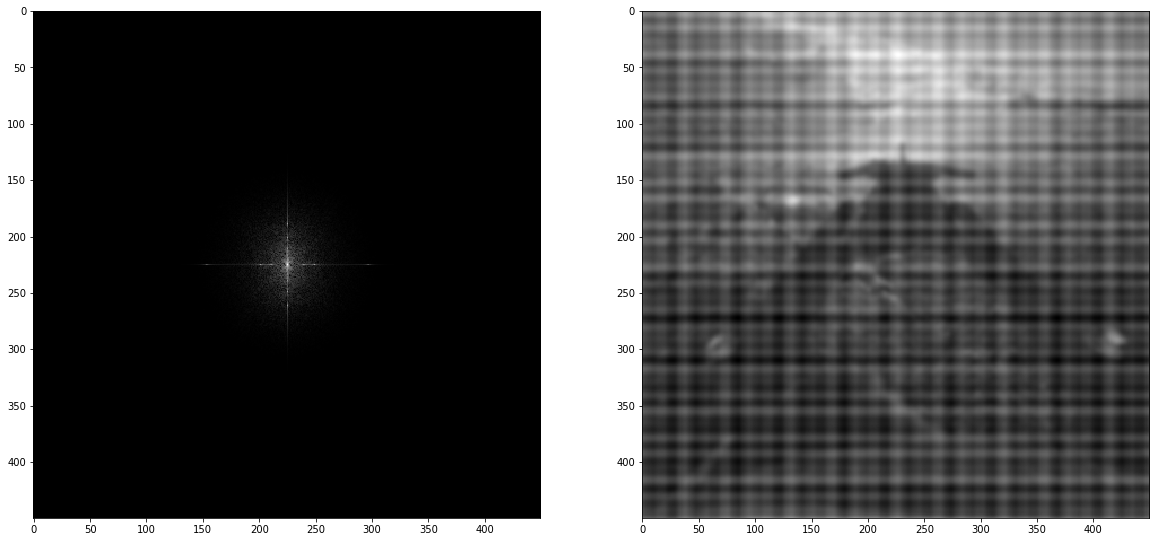

In [148]:
row, col = img.shape


x = cv2.getGaussianKernel(row, 30)
gaussian = x * x.T

f_filter = f * gaussian

img_back = np.fft.ifftshift(f_filter)
img_back = np.fft.ifft2(img_back)
img_back = np.abs(img_back)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1), plt.imshow(np.log(1 + np.abs(f_filter)), cmap='gray')
plt.subplot(1, 2, 2), plt.imshow(img_back, cmap='gray')
plt.show()